## Installing the Necessary Libraries

In [ ]:
!pip install bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 101.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 79.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 49.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import networkx as nx

# Text processing
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# BERTopic model
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from umap import UMAP

In [ ]:
# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import nltk
nltk.download('punkt_tab') # Downloads punkt_tab data package

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# Load dataset
file_path = "/content/drive/MyDrive/Projects/Topic Modeling/Mental-Health-Twitter.csv"
df = pd.read_csv(file_path)

# Display first 5 rows
print(df.head())

   Unnamed: 0             post_id                    post_created  \
0           0  637894677824413696  Sun Aug 30 07:48:37 +0000 2015   
1           1  637890384576778240  Sun Aug 30 07:31:33 +0000 2015   
2           2  637749345908051968  Sat Aug 29 22:11:07 +0000 2015   
3           3  637696421077123073  Sat Aug 29 18:40:49 +0000 2015   
4           4  637696327485366272  Sat Aug 29 18:40:26 +0000 2015   

                                           post_text     user_id  followers  \
0  It's just over 2 years since I was diagnosed w...  1013187241         84   
1  It's Sunday, I need a break, so I'm planning t...  1013187241         84   
2  Awake but tired. I need to sleep but my brain ...  1013187241         84   
3  RT @SewHQ: #Retro bears make perfect gifts and...  1013187241         84   
4  It’s hard to say whether packing lists are mak...  1013187241         84   

   friends  favourites  statuses  retweets  label  
0      211         251       837         0      1  
1     

In [ ]:
df.shape

(20000, 11)

## EDA & Preprocessing

In [ ]:
# Check for missing values
print("\n🔹 Missing Values in Dataset:")
print(df.isnull().sum())


🔹 Missing Values in Dataset:
Unnamed: 0      0
post_id         0
post_created    0
post_text       0
user_id         0
followers       0
friends         0
favourites      0
statuses        0
retweets        0
label           0
dtype: int64


In [ ]:
# Remove duplicates
df = df.drop_duplicates()

In [ ]:
# Unique values in categorical columns
for col in df.select_dtypes(include=['object']):
    print(f"\nUnique values in {col}:")
    print(df[col].unique())
    print(f"Number of unique values in {col}: {df[col].nunique()}")


Unique values in post_created:
['Sun Aug 30 07:48:37 +0000 2015' 'Sun Aug 30 07:31:33 +0000 2015'
 'Sat Aug 29 22:11:07 +0000 2015' ... 'Thu Jan 12 00:05:42 +0000 2017'
 'Thu Jan 12 00:05:22 +0000 2017' 'Thu Jan 12 00:04:47 +0000 2017']
Number of unique values in post_created: 19102

Unique values in post_text:
["It's just over 2 years since I was diagnosed with #anxiety and #depression. Today I'm taking a moment to reflect on how far I've come since."
 "It's Sunday, I need a break, so I'm planning to spend as little time as possible on the #A14..."
 'Awake but tired. I need to sleep but my brain has other ideas...' ...
 'The flow chart is a most thoroughly oversold piece of program documentation. ― Frederick Brooks, Jr., The Mythical Man Month'
 'Ships are safe in harbor, but they were never meant to stay there.'
 'Black holes are where God is dividing by zero.']
Number of unique values in post_text: 19488


In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)  # Remove URLs
    text = re.sub(r"@\w+", "", text)  # Remove mentions
    text = re.sub(r"#\w+", "", text)  # Remove hashtags
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Remove special characters
    tokens = word_tokenize(text)

    stop_words = set(stopwords.words("english"))
    lemmatizer = WordNetLemmatizer()

    text = " ".join([lemmatizer.lemmatize(word) for word in tokens if word not in stop_words])
    return text

df["clean_text"] = df["post_text"].apply(clean_text)

print("\n🔹 Sample Preprocessed Text:")
print(df["clean_text"].head())


🔹 Sample Preprocessed Text:
0    year since diagnosed today im taking moment re...
1    sunday need break im planning spend little tim...
2                    awake tired need sleep brain idea
3    rt bear make perfect gift great beginner get s...
4    hard say whether packing list making life easi...
Name: clean_text, dtype: object


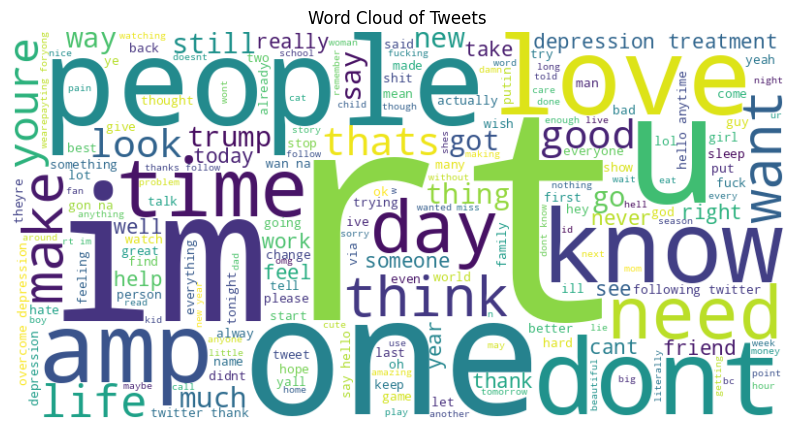

In [ ]:
# Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(df["clean_text"]))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Tweets")
plt.show()

## Sentiment Analysis

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import networkx as nx
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from umap import UMAP
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Sentiment Analysis using Logistic Regression
# 1. Prepare the data
X = df['clean_text']  # Features (cleaned text)
y = df['label']       # Target variable (sentiment label)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Create a feature vector using TF-IDF (or CountVectorizer)
vectorizer = CountVectorizer(max_features=5000) # Adjust max_features as needed
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# 3. Train a Logistic Regression model
model = LogisticRegression(max_iter=1000) # Increased max_iter for convergence
model.fit(X_train_vec, y_train)

# 4. Make predictions on the test set
y_pred = model.predict(X_test_vec)

# 5. Evaluate the model
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


              precision    recall  f1-score   support

           0       0.72      0.75      0.73      1981
           1       0.74      0.72      0.73      2019

    accuracy                           0.73      4000
   macro avg       0.73      0.73      0.73      4000
weighted avg       0.73      0.73      0.73      4000

Accuracy: 0.73075


In [ ]:
# Example prediction for a new tweet
new_tweet = "I'm feeling really happy today!"
new_tweet_vec = vectorizer.transform([clean_text(new_tweet)])
predicted_sentiment = model.predict(new_tweet_vec)[0]
print(f"Predicted sentiment for '{new_tweet}': {predicted_sentiment}")

Predicted sentiment for 'I'm feeling really happy today!': 1


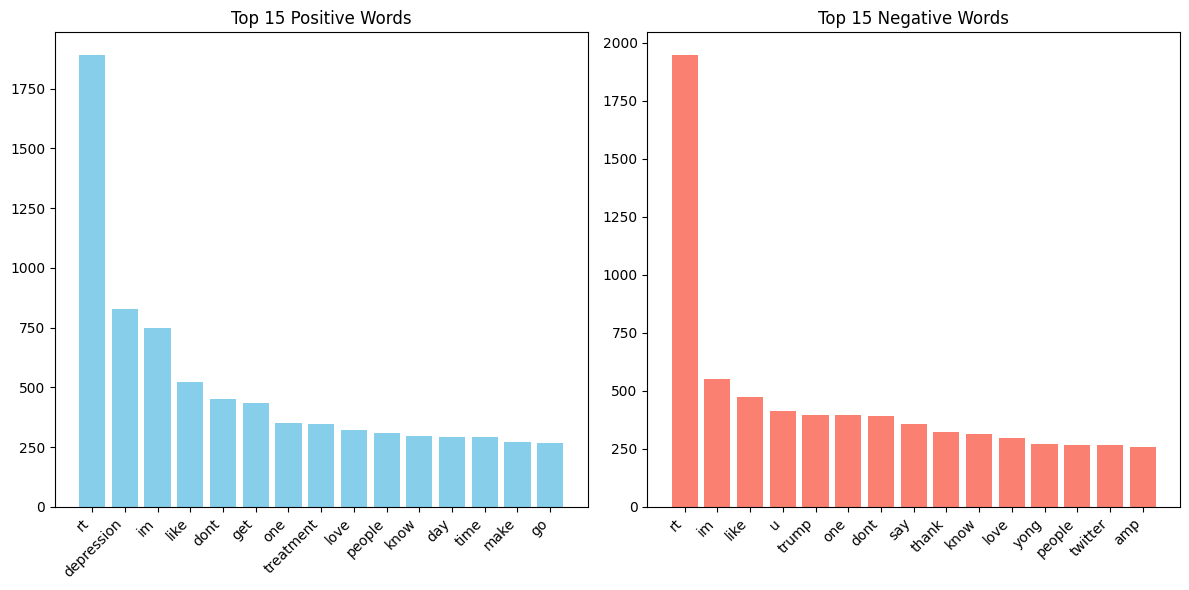

In [ ]:
# Top N words per sentiment
def plot_top_n_words(df, n=10):
    positive_words = ' '.join(df[df['label'] == 1]['clean_text']).split()
    negative_words = ' '.join(df[df['label'] == 0]['clean_text']).split()

    positive_word_counts = Counter(positive_words).most_common(n)
    negative_word_counts = Counter(negative_words).most_common(n)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.bar([word for word, count in positive_word_counts], [count for word, count in positive_word_counts], color='skyblue')
    plt.title('Top {} Positive Words'.format(n))
    plt.xticks(rotation=45, ha='right')

    plt.subplot(1, 2, 2)
    plt.bar([word for word, count in negative_word_counts], [count for word, count in negative_word_counts], color='salmon')
    plt.title('Top {} Negative Words'.format(n))
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

plot_top_n_words(df, n=15)

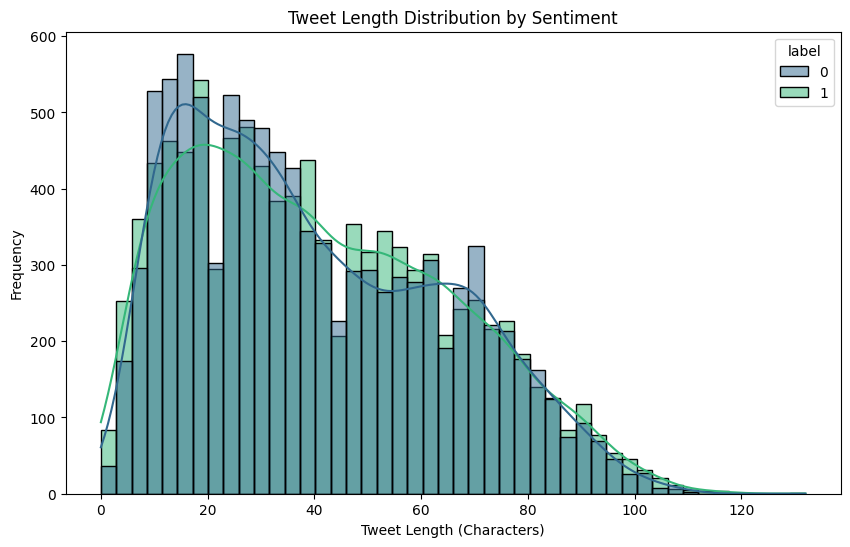

In [ ]:
# Distribution of tweet lengths by sentiment
plt.figure(figsize=(10,6))
df['tweet_length'] = df['clean_text'].str.len()
sns.histplot(data=df, x='tweet_length', hue='label', kde=True, palette="viridis")
plt.title('Tweet Length Distribution by Sentiment')
plt.xlabel('Tweet Length (Characters)')
plt.ylabel('Frequency')
plt.show()

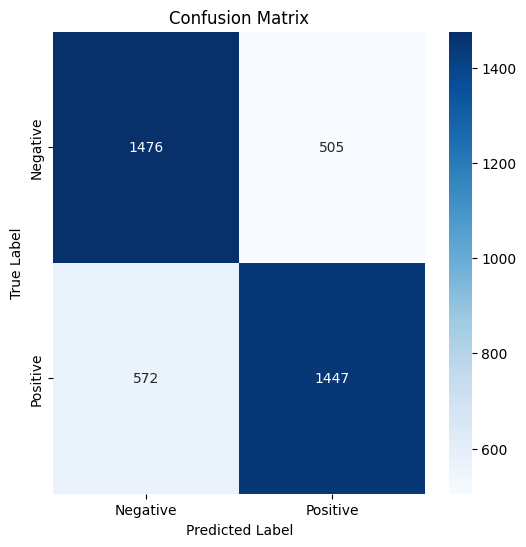

In [ ]:
# Confusion Matrix (for model evaluation)
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Topic Modeling

1. BERTopic

In [ ]:
# Configure BERTopic with UMAP and CountVectorizer
vectorizer_model = CountVectorizer(ngram_range=(1, 2), stop_words="english")
umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.1, metric="cosine")

# Train BERTopic
bertopic_model = BERTopic(umap_model=umap_model, vectorizer_model=vectorizer_model)
topics, probs = bertopic_model.fit_transform(df["clean_text"])

df["topic"] = topics

In [ ]:
# Display extracted topics
print("\n🔹 Top Topics:")
print(bertopic_model.get_topic_info().head())


🔹 Top Topics:
   Topic  Count                                               Name  \
0     -1   7861                                 -1_im_rt_like_dont   
1      0    924                        0_trump_putin_joe_president   
2      1    584  1_user_userbusiness_userasappartsunlimited_bee...   
3      2    428                              2_rt_rt rt_rt got_dun   
4      3    405  3_depression_depression treatment_treatment_ov...   

                                      Representation  \
0  [im, rt, like, dont, people, make, need, day, ...   
1  [trump, putin, joe, president, fox, propaganda...   
2  [user, userbusiness, userasappartsunlimited, b...   
3  [rt, rt rt, rt got, dun, fuck rt, rt thing, fu...   
4  [depression, depression treatment, treatment, ...   

                                 Representative_Docs  
0  [doesnt feel like last day, look like oh god, ...  
1  [trump press secretary begs american people st...  
2        [josiahlake gardiner solicitor, user, user]  
3      

In [ ]:
from hdbscan import HDBSCAN

In [ ]:
# Configure BERTopic with topic reduction
vectorizer_model = CountVectorizer(ngram_range=(1, 2), stop_words="english")
umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.1, metric='cosine')
hdbscan_model = HDBSCAN(min_cluster_size=50)  # Removes very small topics

# Initialize BERTopic with topic reduction
# Remove nr_topics from here to allow automatic topic discovery
bertopic_model = BERTopic(
                          hdbscan_model=hdbscan_model,
                          umap_model=umap_model,
                          vectorizer_model=vectorizer_model)

topics, probs = bertopic_model.fit_transform(df['clean_text'])
df['topic'] = topics

# Further refine topics after training
# Set nr_topics to a desired value for reduction
bertopic_model.reduce_topics(df['clean_text'], nr_topics="auto")

In [ ]:
# Display top topics
print(bertopic_model.get_topic_info().head())

   Topic  Count                                               Name  \
0     -1  10503                                 -1_rt_im_like_dont   
1      0   1486                            0_rt_tweet_love_twitter   
2      1    914                        1_trump_putin_joe_president   
3      2    824                              2_cat_eat_animal_food   
4      3    809  3_depression_treatment_depression treatment_ov...   

                                      Representation  \
0  [rt, im, like, dont, people, love, know, time,...   
1  [rt, tweet, love, twitter, life, song, good, m...   
2  [trump, putin, joe, president, fox, propaganda...   
3  [cat, eat, animal, food, vegan, dog, chicken, ...   
4  [depression, treatment, depression treatment, ...   

                                 Representative_Docs  
0                            [know, know, love much]  
1                            [rt still, rt, rt part]  
2  [see trump supporter, trump press secretary be...  
3  [rt dont hate peopl

In [ ]:
# Bar Chart of Topic Distribution
bertopic_model.visualize_barchart(top_n_topics=10)
plt.show()

# Inter-topic Distance Map
bertopic_model.visualize_topics()
plt.show()

In [ ]:
# Display Topic Similarity Matrix
bertopic_model.visualize_heatmap()
plt.show()

In [ ]:
# Display Topic Coherence Score
coherence_score = bertopic_model.get_topic_info()
print("\n🔹 BERTopic Coherence Score:", coherence_score)


🔹 BERTopic Coherence Score:     Topic  Count                                               Name  \
0      -1  10503                                 -1_rt_im_like_dont   
1       0   1486                            0_rt_tweet_love_twitter   
2       1    914                        1_trump_putin_joe_president   
3       2    824                              2_cat_eat_animal_food   
4       3    809  3_depression_treatment_depression treatment_ov...   
5       4    701                                4_ugly_im_hate_look   
6       5    628  5_siding_user_national concrete_concrete acces...   
7       6    508   6_yong_wearepayting_foryong_wearepayting foryong   
8       7    330  7_following twitter_twitter thank_following_sa...   
9       8    329                   8_migraine_headache_remedy_cause   
10      9    264                              9_game_rt_second_yard   
11     10    240                            10_mom_dad_parent_child   
12     11    236                     11_sleep_go

In [ ]:
# Bar Chart of Topic Distribution (improved)
fig = bertopic_model.visualize_barchart(top_n_topics=10)
fig.update_layout(title_text="Top 10 Topic Distribution", title_x=0.5) #Added title and centered it
fig.show()

In [ ]:
# Inter-topic Distance Map (improved)
fig = bertopic_model.visualize_topics()
fig.update_layout(title_text="Intertopic Distance Map", title_x=0.5) #Added title and centered it
fig.show()

In [ ]:
# Display Topic Similarity Matrix (improved)
fig = bertopic_model.visualize_heatmap()
fig.update_layout(title_text="Topic Similarity Heatmap", title_x=0.5) #Added title and centered it
fig.show()

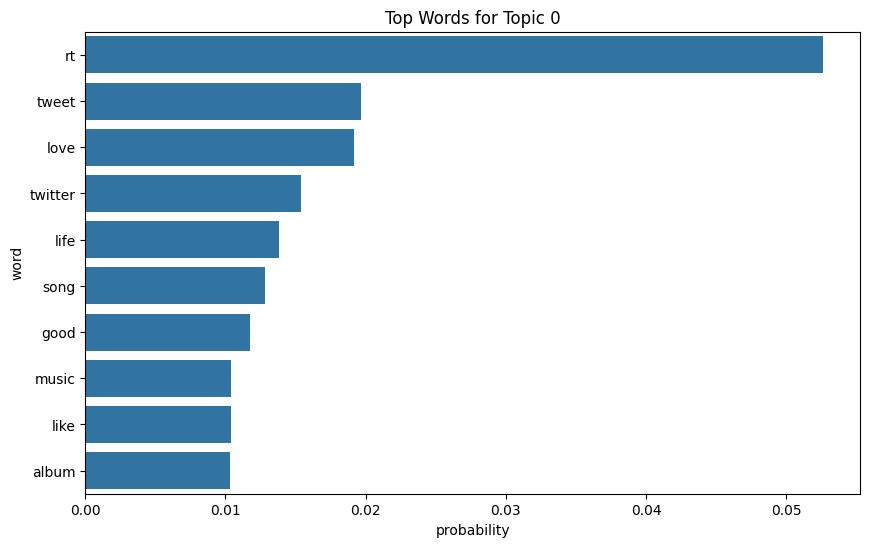

In [ ]:
# Example of visualizing top words for a specific topic
topic_num = 0  # Example: visualizing top words for topic 0
top_words = bertopic_model.get_topic(topic_num)
df_top_words = pd.DataFrame(top_words, columns=['word', 'probability'])
plt.figure(figsize=(10, 6))
sns.barplot(x='probability', y='word', data=df_top_words)
plt.title(f"Top Words for Topic {topic_num}")
plt.show()

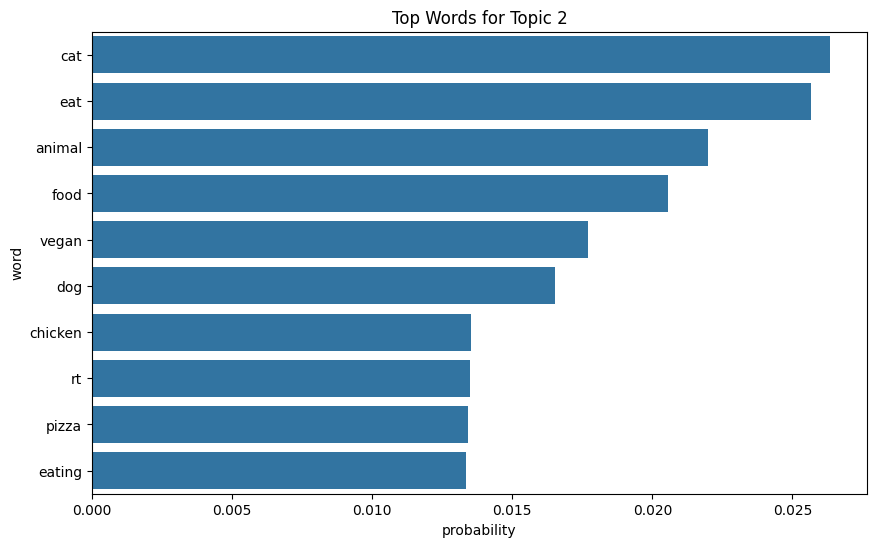

In [ ]:
# Example of visualizing top words for a specific topic
topic_num = 2  # Example: visualizing top words for topic 0
top_words = bertopic_model.get_topic(topic_num)
df_top_words = pd.DataFrame(top_words, columns=['word', 'probability'])
plt.figure(figsize=(10, 6))
sns.barplot(x='probability', y='word', data=df_top_words)
plt.title(f"Top Words for Topic {topic_num}")
plt.show()

In [ ]:
# coherence score for the BERTopic model

print("\n🔹 BERTopic Coherence Score:")
print(bertopic_model.get_topic_info())



🔹 BERTopic Coherence Score:
    Topic  Count                                               Name  \
0      -1  10503                                 -1_rt_im_like_dont   
1       0   1486                            0_rt_tweet_love_twitter   
2       1    914                        1_trump_putin_joe_president   
3       2    824                              2_cat_eat_animal_food   
4       3    809  3_depression_treatment_depression treatment_ov...   
5       4    701                                4_ugly_im_hate_look   
6       5    628  5_siding_user_national concrete_concrete acces...   
7       6    508   6_yong_wearepayting_foryong_wearepayting foryong   
8       7    330  7_following twitter_twitter thank_following_sa...   
9       8    329                   8_migraine_headache_remedy_cause   
10      9    264                              9_game_rt_second_yard   
11     10    240                            10_mom_dad_parent_child   
12     11    236                     11_sleep_go

2. LDA (Latent Dirichlet Allocation)

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

# TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=1000)
dtm = vectorizer.fit_transform(df["clean_text"])

# Train LDA model
lda_model = LatentDirichletAllocation(n_components=10, random_state=42)  # Adjust n_components (number of topics)
lda_model.fit(dtm)

# Get topic-word distributions
topic_word_distributions = lda_model.components_

# Get the feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Function to display top words for each topic
def display_topics(model, feature_names, num_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-num_top_words - 1:-1]]))

In [ ]:
# Display top 10 words for each topic
num_top_words = 10
display_topics(lda_model, feature_names, num_top_words)

Topic 0:
trump rt got via putin thing today omg one would
Topic 1:
thanks hey follow best video zayn rt lol christmas watch
Topic 2:
rt health man wearepayting foryong mental great time take wish
Topic 3:
rt right look need feel like im make wait going
Topic 4:
rt love migraine hate headache happy ok please morning help
Topic 5:
rt oh talk god girl business like good stop go
Topic 6:
dont rt life actually get mean never done aleph even
Topic 7:
thank say twitter yong hello following rt anytime let real
Topic 8:
year rt new thats guy sorry im friend miss season
Topic 9:
depression treatment na fuck im gon overcome yes cute wan


In [ ]:
# Get document-topic distributions
document_topic_distributions = lda_model.transform(dtm)
df["lda_topic"] = document_topic_distributions.argmax(axis=1)

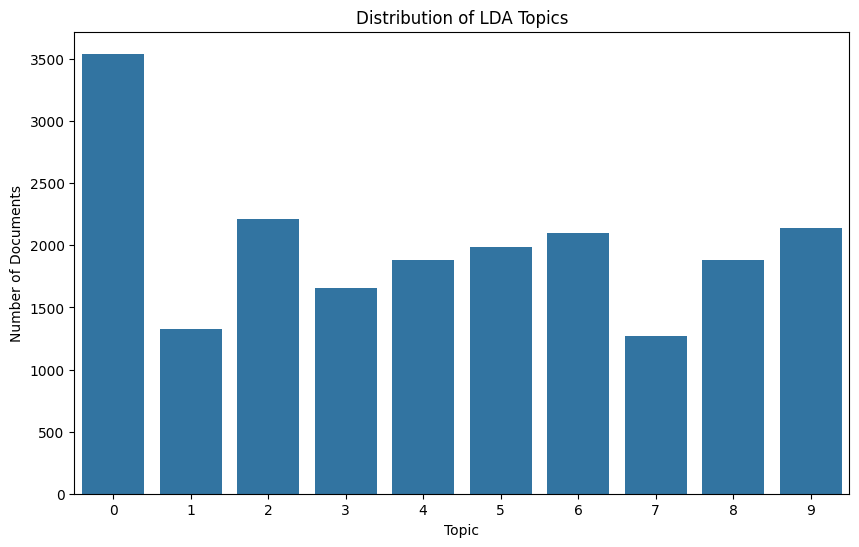

In [ ]:
# Visualize topic distributions (example: bar chart)
topic_counts = df['lda_topic'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=topic_counts.index, y=topic_counts.values)
plt.title("Distribution of LDA Topics")
plt.xlabel("Topic")
plt.ylabel("Number of Documents")
plt.show()

In [ ]:
!pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 20.4 MB/s eta 0:00:00


In [ ]:
# Function to display top words for each topic with probabilities
def display_topics_with_probs(model, feature_names, num_top_words):
    for topic_idx, topic in enumerate(model.components_):
        top_words_idx = topic.argsort()[:-num_top_words - 1:-1]
        top_words = [feature_names[i] for i in top_words_idx]
        top_probs = topic[top_words_idx]
        print(f"Topic {topic_idx}:")
        for word, prob in zip(top_words, top_probs):
          print(f"  - {word}: {prob:.4f}")


# Display top 10 words for each topic with probabilities
num_top_words = 10
display_topics_with_probs(lda_model, feature_names, num_top_words)

Topic 0:
  - trump: 347.5748
  - would: 328.2202
  - look: 273.8024
  - today: 260.2941
  - like: 225.0502
  - thing: 213.8410
  - via: 212.5855
  - rt: 173.1326
  - much: 163.2969
  - think: 147.4653
Topic 1:
  - best: 251.8044
  - hey: 232.1000
  - thanks: 225.1000
  - follow: 193.1000
  - lol: 191.0999
  - girl: 170.5389
  - video: 164.0235
  - think: 153.5398
  - zayn: 127.1000
  - ive: 110.8351
Topic 2:
  - rt: 1479.9745
  - man: 206.9813
  - time: 180.3555
  - go: 157.7541
  - amp: 151.0806
  - take: 142.1616
  - want: 136.1552
  - next: 123.8291
  - mental: 119.0913
  - come: 109.0558
Topic 3:
  - depression: 834.1000
  - treatment: 348.1000
  - overcome: 221.1000
  - help: 162.6152
  - right: 133.8310
  - need: 107.7081
  - ill: 98.4562
  - feel: 97.9681
  - child: 92.0393
  - sad: 77.0999
Topic 4:
  - love: 616.9749
  - rt: 584.9858
  - youre: 358.8080
  - happy: 197.3132
  - see: 188.9928
  - please: 169.6530
  - migraine: 168.1000
  - hope: 164.9435
  - show: 159.0955
  - so

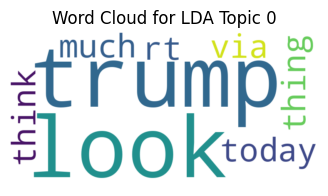

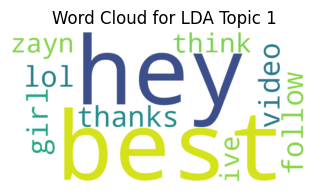

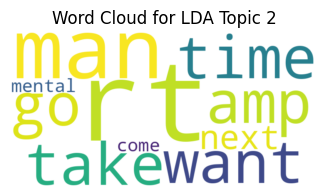

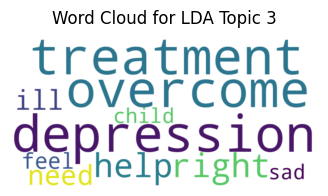

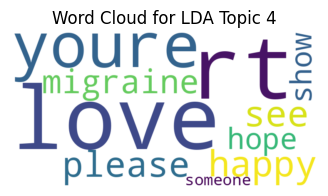

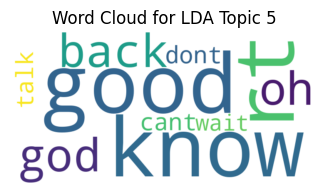

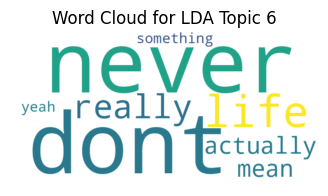

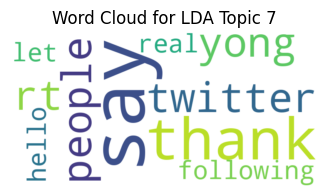

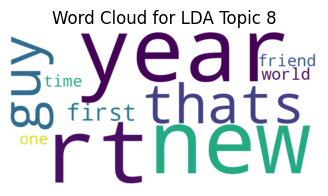

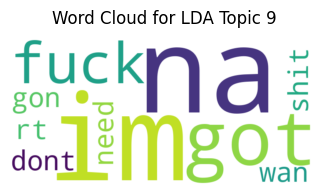

In [ ]:
# Visualize LDA topics with pyLDAvis
import pyLDAvis
#import pyLDAvis.sklearn # This line is no longer needed and causing the error
import pyLDAvis.lda_model # Import the correct submodule for sklearn models

pyLDAvis.enable_notebook()
#vis = pyLDAvis.sklearn.prepare(lda_model, dtm, vectorizer, mds='tsne') # Use tsne for better visualization
vis = pyLDAvis.lda_model.prepare(lda_model, dtm, vectorizer, mds='tsne') # Call prepare from the correct submodule
vis

# Additional visualization: Word clouds for each topic
for topic_idx in range(lda_model.n_components):
    topic_words = [feature_names[i] for i in lda_model.components_[topic_idx].argsort()[:-num_top_words-1:-1]]
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(topic_words))
    plt.figure(figsize=(6, 2))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for LDA Topic {topic_idx}")
    plt.show()

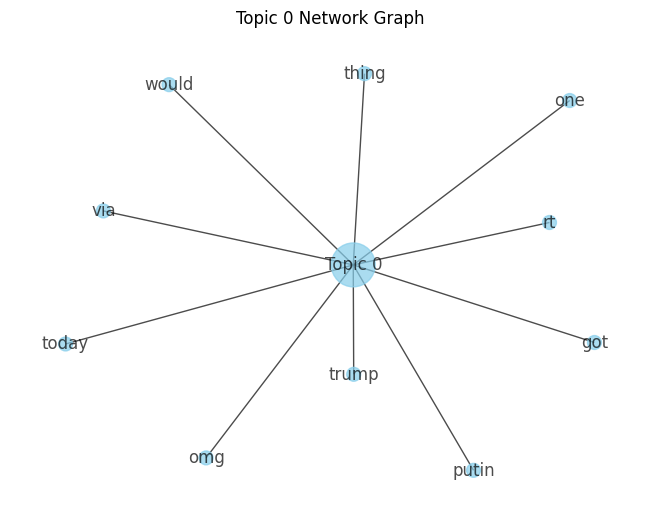

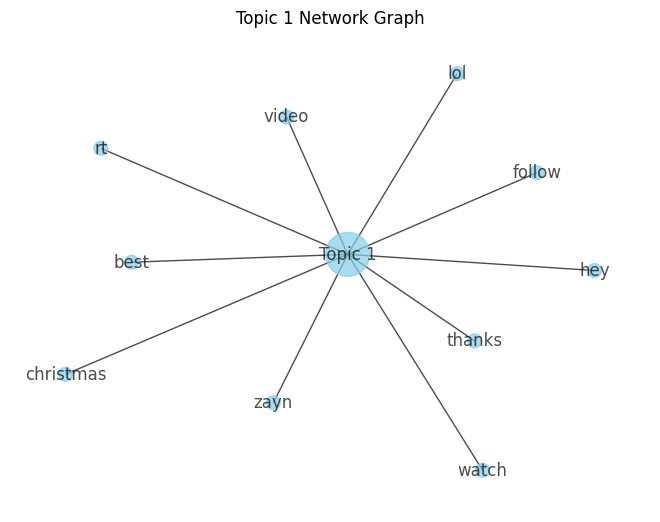

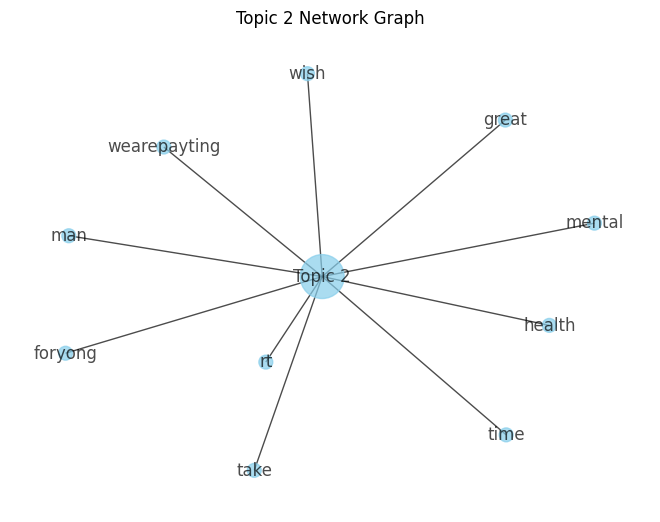

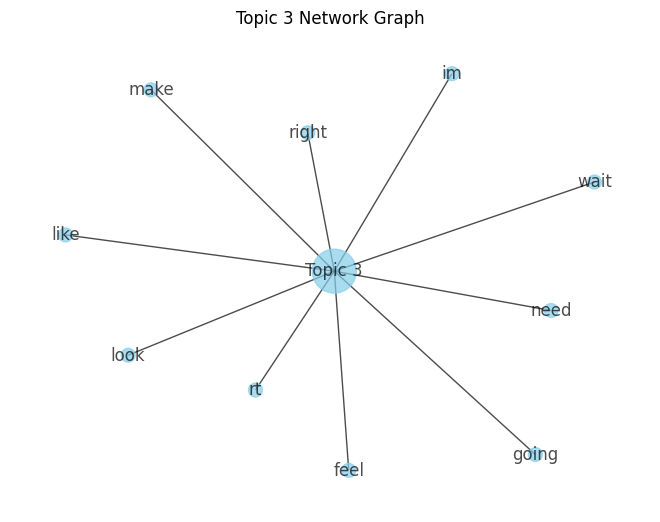

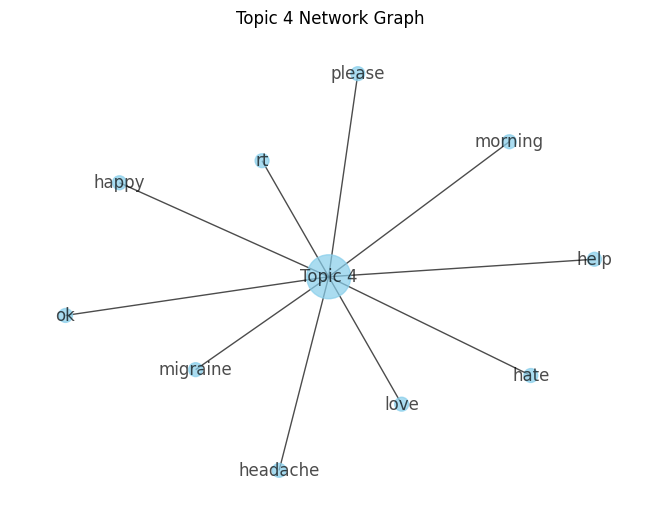

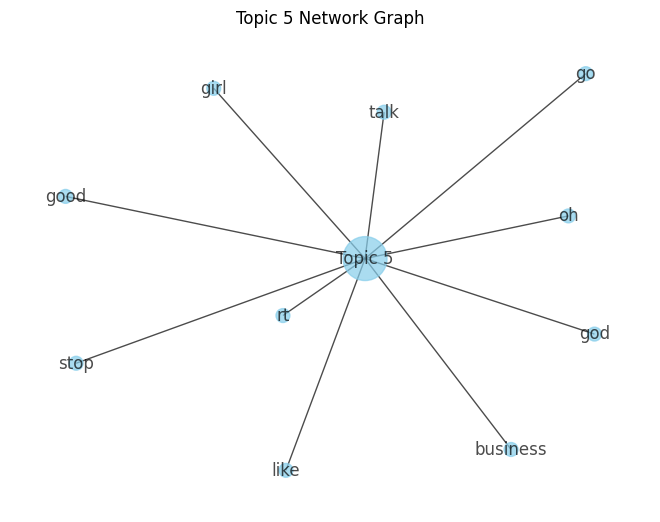

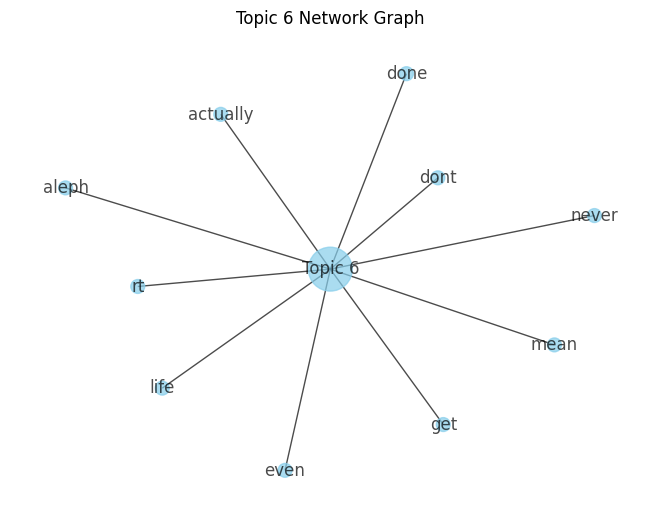

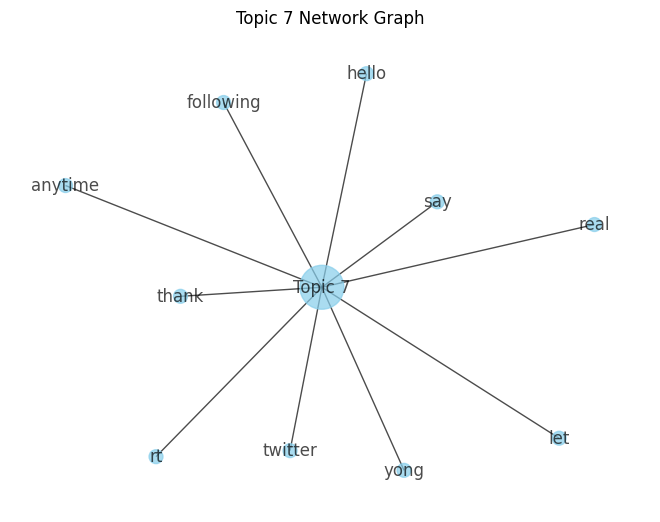

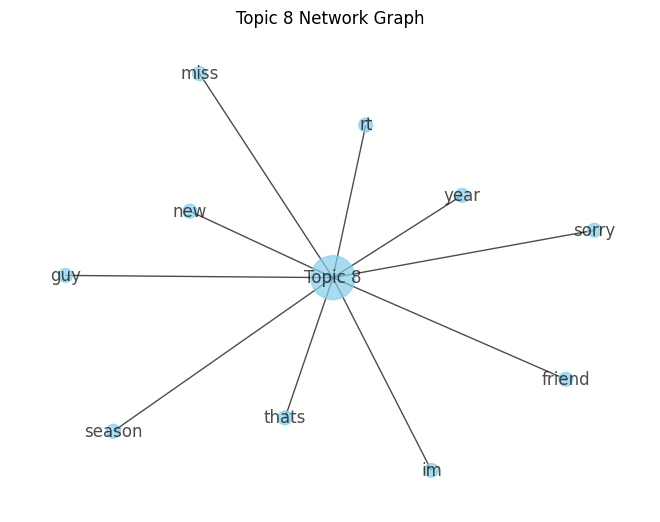

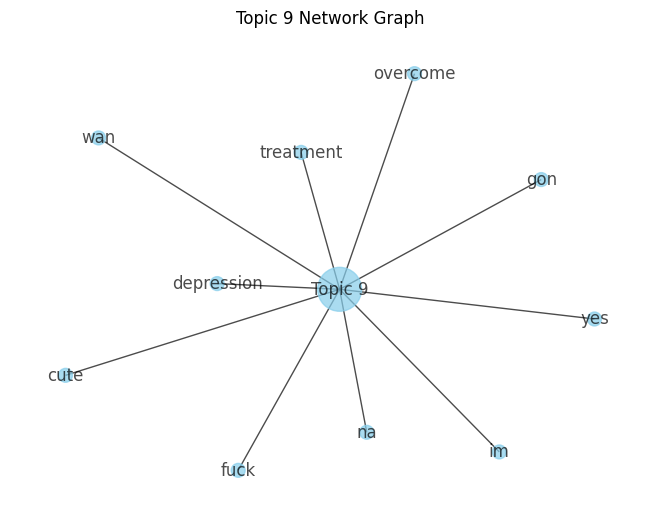

In [ ]:
# Network graph of topics and top words
for topic_idx, topic in enumerate(lda_model.components_):
  top_words = [feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]
  graph = nx.Graph()
  graph.add_node(f"Topic {topic_idx}", weight=10) #Topic Node
  for word in top_words:
    graph.add_node(word, weight=1) #Word Nodes
    graph.add_edge(f"Topic {topic_idx}", word, weight = topic[np.where(feature_names == word)][0])
  pos = nx.spring_layout(graph) #Positions of nodes
  nx.draw(graph, pos, with_labels=True, node_size = [v * 100 for v in dict(graph.degree).values()], node_color = "skyblue", alpha = 0.7)
  plt.title(f"Topic {topic_idx} Network Graph")
  plt.show()